## Plotting geological map and the site rock types 
### This notebook will output the geology information of the input station list.

The ecoregions file are from United States Department of Agriculture.<br>
You can submit a request and download data via this URL:
https://datagateway.nrcs.usda.gov/GDGOrder.aspx# <br>
(The example folder has the file downloaded already).

In [1]:
#!pip install fiona dbfread

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import fiona
import pygmt

In [3]:
# Path to the shapefile
shp_path = "geology_GEOLOGY_ca_4169149_01/geology_a_ca.shp"

# Load the shapefile
ca_gdf = gpd.read_file(shp_path)

# Check the contents of the GeoDataFrame
ca_gdf.head()


,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,AGE_MIN,AGE_MAX,MAJOR1,MAJOR2,MAJOR3,...,REF_ID,REFERENCE,GENERALIZE,DIGITAL_UR,NGMDB1,NGMDB2,NGMDB3,RuleID,FIPS_C,geometry
0,CA,C,C1;0,CAC1;0,"Carboniferous marine rocks, unit 1 (Western Mo...",Phanerozoic - Paleozoic - Carboniferous - Penn...,preCambrian-Proterozoic - Neoproterozoic,Marble,None,None,...,CA294,"Jennings, C.W., with modifications by Gutierre...","Metamorphic, carbonate",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,None,None,8,06,"POLYGON ((-117.26033 34.87809, -117.26213 34.8..."
1,CA,C,C1;0,CAC1;0,"Carboniferous marine rocks, unit 1 (Western Mo...",Phanerozoic - Paleozoic - Carboniferous - Penn...,preCambrian-Proterozoic - Neoproterozoic,Marble,None,None,...,CA294,"Jennings, C.W., with modifications by Gutierre...","Metamorphic, carbonate",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,None,None,8,06,"POLYGON ((-116.65551 34.23283, -116.65392 34.2..."
2,CA,C,C1;0,CAC1;0,"Carboniferous marine rocks, unit 1 (Western Mo...",Phanerozoic - Paleozoic - Carboniferous - Penn...,preCambrian-Proterozoic - Neoproterozoic,Marble,None,None,...,CA294,"Jennings, C.W., with modifications by Gutierre...","Metamorphic, carbonate",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,None,None,8,06,"POLYGON ((-117.05908 34.63956, -117.05874 34.6..."
3,CA,C,C1;0,CAC1;0,"Carboniferous marine rocks, unit 1 (Western Mo...",Phanerozoic - Paleozoic - Carboniferous - Penn...,preCambrian-Proterozoic - Neoproterozoic,Marble,None,None,...,CA294,"Jennings, C.W., with modifications by Gutierre...","Metamorphic, carbonate",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,None,None,8,06,"POLYGON ((-116.73905 34.14669, -116.7412 34.14..."
4,CA,C,C1;0,CAC1;0,"Carboniferous marine rocks, unit 1 (Western Mo...",Phanerozoic - Paleozoic - Carboniferous - Penn...,preCambrian-Proterozoic - Neoproterozoic,Marble,None,None,...,CA294,"Jennings, C.W., with modifications by Gutierre...","Metamorphic, carbonate",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,None,None,8,06,"POLYGON ((-117.35962 34.85217, -117.36006 34.8..."


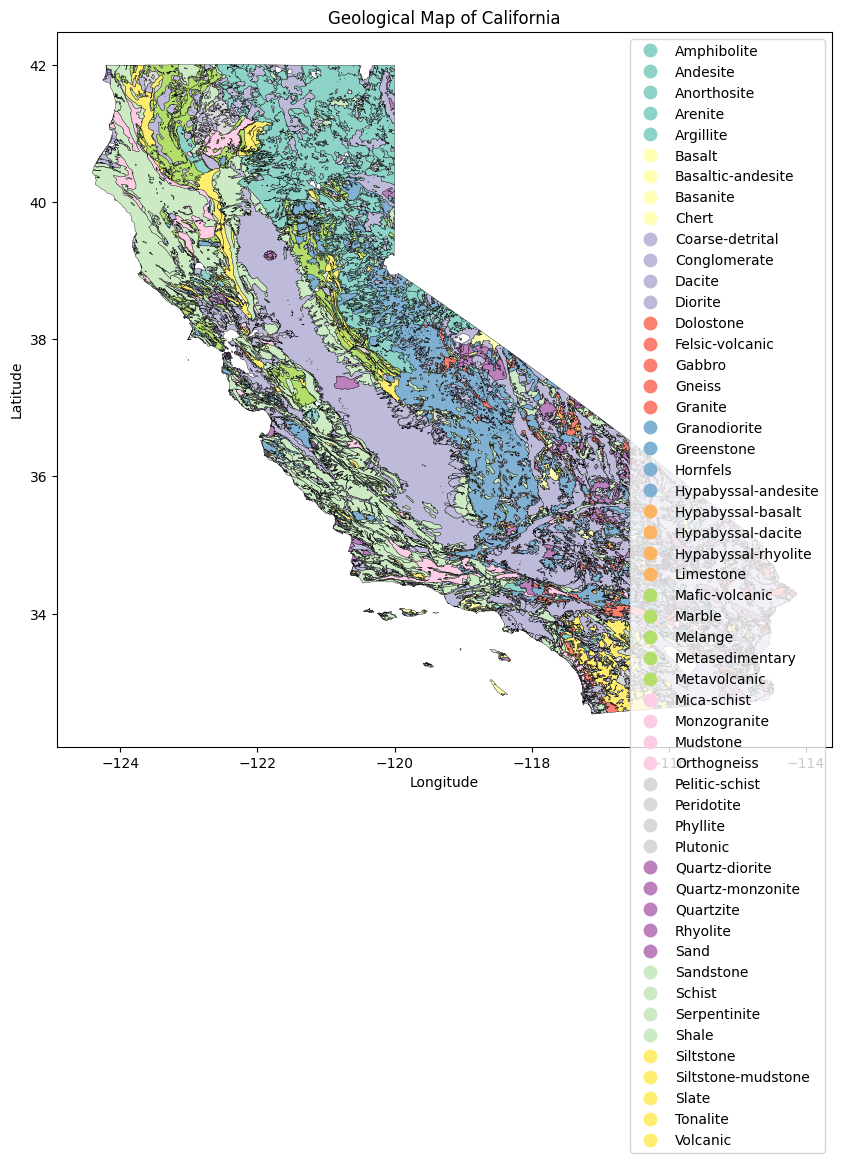

In [4]:

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the merged GeoDataFrame
# Replace 'geological_type' with the actual column name you want to visualize
ca_gdf.plot(ax=ax, column='MAJOR1',  # Change to your actual column name
                cmap='Set3',  # Choose a color map
                edgecolor='black',  # Outline color for each shape
                linewidth=0.25,  # Width of the shape outline
                legend=True)  # Show legend

# Add title and labels
ax.set_title("Geological Map of California")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect('equal')  # Maintain aspect ratio

# Show the plot
plt.show()


Convert the coordination to WGS84. 

In [5]:

# Set CRS of geological GeoDataFrame if it's undefined
combined_gdf = ca_gdf.set_crs("EPSG:4326", allow_override=True)

In [6]:

# Load the station list with latitude and longitude
stations_path = "CI.csv"  # Replace with actual file path
stations_df = pd.read_csv(stations_path)

# Convert the station DataFrame to a GeoDataFrame
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df.stlo, stations_df.stla),
    crs="EPSG:4326"  # Assuming coordinates are in WGS 84
)

# Check the stations GeoDataFrame
stations_gdf.head()


,netst,stla,stlo,geometry
0,CI.ALP,34.687080,-118.299461,POINT (-118.29946 34.68708)
1,CI.ARV,35.126900,-118.830093,POINT (-118.83009 35.1269)
2,CI.BAI,34.776951,-118.773354,POINT (-118.77335 34.77695)
3,CI.BAK,35.344440,-119.104446,POINT (-119.10445 35.34444)
4,CI.BBR,34.262299,-116.920753,POINT (-116.92075 34.2623)


In [7]:

# Perform spatial join between stations and geological units
station_geology_gdf = gpd.sjoin(stations_gdf, combined_gdf, how="left", predicate="within")

# Check results
print(station_geology_gdf[['netst', 'MAJOR1']])  # Replace with actual columns
station_geology_gdf.head()
station_geology_gdf.to_csv('ca_station_geology.csv', index=False)

       netst           MAJOR1
0     CI.ALP  Coarse-detrital
1     CI.ARV        Sandstone
2     CI.BAI        Sandstone
3     CI.BAK  Coarse-detrital
4     CI.BBR  Coarse-detrital
..       ...              ...
196   CI.WSS        Sandstone
197  CI.WTT2  Coarse-detrital
198   CI.WWC      Orthogneiss
199  CI.XTL2     Granodiorite
200  CI.YEG2        Sandstone

[201 rows x 2 columns]


In [8]:
geo_df=pd.read_csv('ca_station_geology.csv')
geo_df.head(5)

,netst,stla,stlo,geometry,index_right,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,...,INDETERMIN,REF_ID,REFERENCE,GENERALIZE,DIGITAL_UR,NGMDB1,NGMDB2,NGMDB3,RuleID,FIPS_C
0,CI.ALP,34.687080,-118.299461,POINT (-118.299461 34.68708),4810,CA,Q,Q;0,CAQ;0,Quaternary alluvium and marine deposits,...,NaN,CA294,"Jennings, C.W., with modifications by Gutierre...","Unconsolidated, undifferentiated",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,NaN,NaN,29,6
1,CI.ARV,35.126900,-118.830093,POINT (-118.830093 35.1269),2786,CA,M,MI;0,CAMI;0,Miocene marine rocks,...,NaN,CA294,"Jennings, C.W., with modifications by Gutierre...","Sedimentary, clastic",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,NaN,NaN,23,6
2,CI.BAI,34.776951,-118.773354,POINT (-118.773354 34.776951),2829,CA,M,MI;0,CAMI;0,Miocene marine rocks,...,NaN,CA294,"Jennings, C.W., with modifications by Gutierre...","Sedimentary, clastic",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,NaN,NaN,23,6
3,CI.BAK,35.344440,-119.104446,POINT (-119.104446 35.34444),4830,CA,Q,Q;0,CAQ;0,Quaternary alluvium and marine deposits,...,NaN,CA294,"Jennings, C.W., with modifications by Gutierre...","Unconsolidated, undifferentiated",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,NaN,NaN,29,6
4,CI.BBR,34.262299,-116.920753,POINT (-116.920753 34.262299),4848,CA,Q,Q;0,CAQ;0,Quaternary alluvium and marine deposits,...,NaN,CA294,"Jennings, C.W., with modifications by Gutierre...","Unconsolidated, undifferentiated",ftp://ftp.consrv.ca.gov/pub/dmg/rgmp/Published...,https://ngmdb.usgs.gov/Prodesc/proddesc_96750.htm,NaN,NaN,29,6


coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


Plotting Coarse-detrital with color #8dd3c7
Plotting Sandstone with color #8dd3c7
Plotting Plutonic with color #ffffb3
Plotting Orthogneiss with color #ffffb3
Plotting Shale with color #bebada
Plotting Serpentinite with color #bebada
Plotting Gneiss with color #fb8072
Plotting Anorthosite with color #80b1d3
Plotting Tonalite with color #80b1d3
Plotting Mudstone with color #fdb462
Plotting Argillite with color #fdb462
Plotting Felsic-volcanic with color #b3de69
Plotting Rhyolite with color #b3de69
Plotting Granodiorite with color #fccde5
Plotting Pelitic-schist with color #d9d9d9
Plotting Diorite with color #d9d9d9
No data to plot for nan
Plotting Basalt with color #bc80bd
Plotting Hypabyssal-rhyolite with color #ccebc5
Plotting Hypabyssal-basalt with color #ccebc5
Plotting Dacite with color #ffed6f
Plotting Conglomerate with color #ffed6f


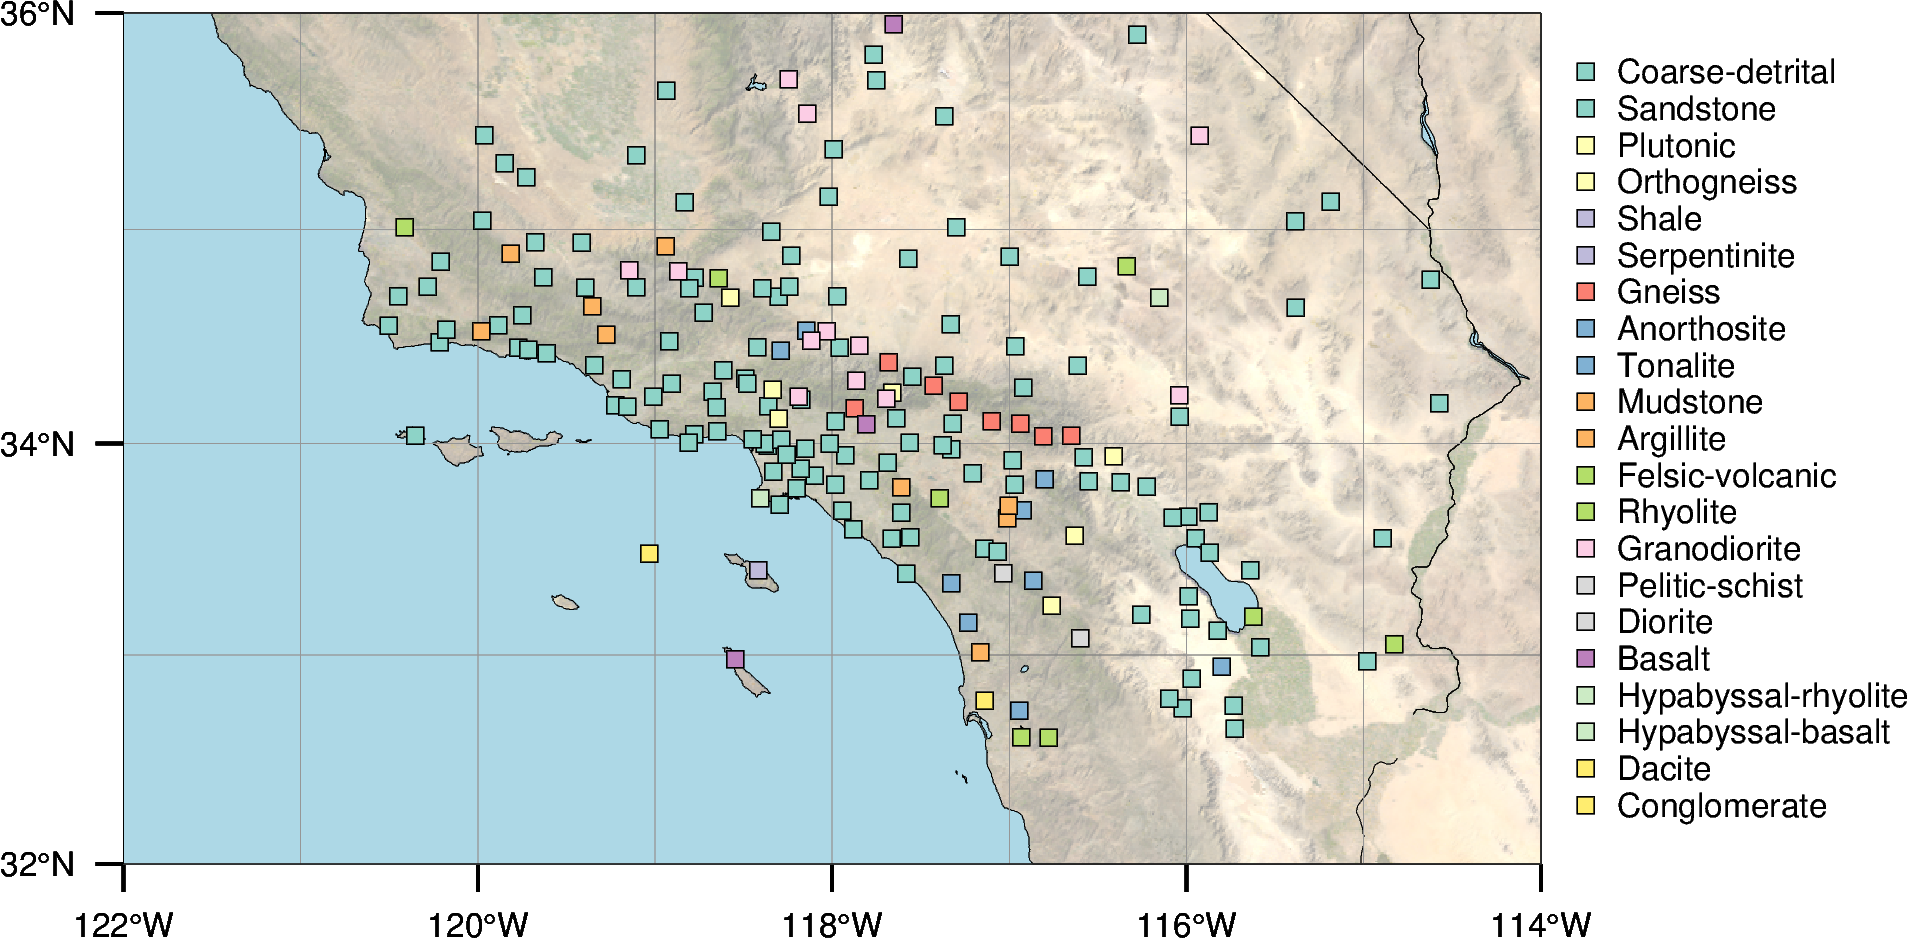

In [9]:
import pandas as pd
import pygmt
from matplotlib.colors import to_hex

# Load CSV data
df = geo_df

region=[-122,-114,32,36]
proj='M6c'
# Initialize the figure
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
 
# Plot the basemap
fig.basemap(region=region,  projection=proj, frame="a2g1", )
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )

fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)
# Plot each unique NA_L3KEY as a different color
unique_keys = df['MAJOR1'].unique()

# Get colormap
cmap = plt.get_cmap('Set3', len(unique_keys))
# Plot each unique NA_L3NAME with corresponding color from the colormap
for i, key in enumerate(unique_keys):
    subset = df[df['MAJOR1'] == key]
    
    # Check if subset is not empty
    if not subset.empty and len(subset) > 0:
        color = to_hex(cmap(i)[:3])  # Get the color from the colormap
        print(f"Plotting {key} with color {color}")
        # Plot with the same length for x and y
        fig.plot(
            x=subset['stlo'],
            y=subset['stla'],
            style="s0.1c",  # Circle style with size
            pen="0.1p,black",
            fill=color,  # Use RGB values; color is returned as (R, G, B, A)
            label=key
        )
    else:
        print(f"No data to plot for {key}")

# Add a legend
fig.legend(position="JMR",)
fig.show(dpi=600)
